<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [ ]:
# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Inspect the columns of the dataset
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


 Feature Selection with Forward Selection and Backward Elimination
Since your dataset consists of numerical columns, we can proceed with Forward Selection and Backward Elimination using RandomForestClassifier to select features based on their importance.

Explanation:
Forward Selection:

Starts with no features and gradually adds the best features based on accuracy.

Uses SequentialFeatureSelector with direction='forward' to iteratively select features that contribute the most to model performance.

Backward Elimination:

Starts with all features and eliminates the least important ones.

Uses SequentialFeatureSelector with direction='backward' to remove features that don't improve accuracy.

Visualization:

After feature selection, you visualize the selected features using a bar plot for both Forward and Backward methods.

Performance Evaluation:
After performing both Forward Selection and Backward Elimination, you evaluate the performance of the model using accuracy.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Selected Features (Forward Selection): Index(['housing_median_age', 'total_rooms', 'population', 'households',
       'median_income'],
      dtype='object')

Forward Selection Model Performance:
Accuracy: 0.02666666666666667


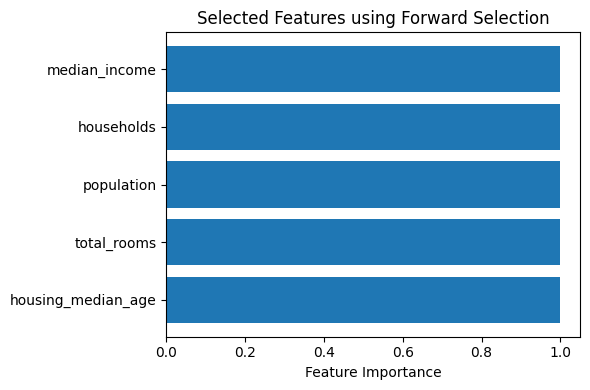

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

### Forward Selection ###
forward_selector = SequentialFeatureSelector(
    rf_model,
    n_features_to_select=5,  # Limit number of features selected to 5
    direction='forward',
    scoring='accuracy',
    n_jobs=1  # Disable parallelism to speed up the process
)

# Fit the selector
forward_selector.fit(X_train, y_train)

# Get selected features
selected_forward_features = X_train.columns[forward_selector.get_support()]
print("Selected Features (Forward Selection):", selected_forward_features)

# Transform data using selected features
X_train_selected_forward = forward_selector.transform(X_train)
X_test_selected_forward = forward_selector.transform(X_test)

# Train and evaluate the model with selected features
rf_model.fit(X_train_selected_forward, y_train)
y_pred_forward = rf_model.predict(X_test_selected_forward)

# Evaluate performance
print("\nForward Selection Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_forward))

# Visualize selected features
plt.figure(figsize=(6, 4))
plt.barh(selected_forward_features, [1] * len(selected_forward_features))
plt.title("Selected Features using Forward Selection")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


To perform Recursive Feature Elimination (RFE) using a Random Forest Classifier, we can follow a simple process. RFE is a feature selection method that recursively removes the least important features based on the model's performance.

Here’s the process to perform RFE on the dataset:

Steps:
Initialize a RandomForestClassifier.

Use RFE from sklearn.feature_selection to select features based on feature importance.

Visualize the selected features and evaluate the model.

Explanation:
Recursive Feature Elimination (RFE):

The RFE method recursively removes the least important features from the dataset, using the provided model (in this case, RandomForestClassifier).

We specify n_features_to_select=5 to choose the top 5 most important features, but you can adjust this parameter as needed.

The method internally ranks all features based on their importance and removes the least important ones.

Model Training:

After selecting the important features using RFE, we retrain the model (RandomForestClassifier) with the selected features and make predictions.

Evaluation:

The model is evaluated using the accuracy score on the test set to determine how well the selected features perform.

Visualization:

A bar plot is generated to show the selected features, visualizing their importance.

Performance Evaluation:
The accuracy score of the model is printed to show how well the Random Forest classifier performs with the selected features.

This method is particularly useful when you want to identify the most relevant features for improving model accuracy or reducing dimensionality.

Selected Features (RFE): Index(['longitude', 'total_rooms', 'population', 'households',
       'median_income'],
      dtype='object')

RFE Model Performance:
Accuracy: 0.02666666666666667


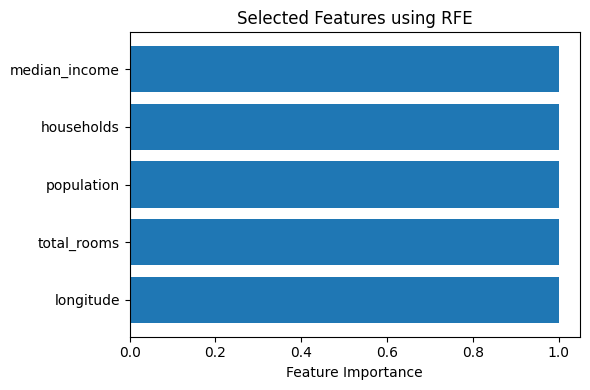

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE (Recursive Feature Elimination) with Random Forest as the estimator
rfe_selector = RFE(estimator=rf_model, n_features_to_select=5)  # Select top 5 features

# Fit RFE to the data
rfe_selector.fit(X_train, y_train)

# Get selected features
selected_rfe_features = X_train.columns[rfe_selector.support_]
print("Selected Features (RFE):", selected_rfe_features)

# Transform the data using the selected features
X_train_selected_rfe = rfe_selector.transform(X_train)
X_test_selected_rfe = rfe_selector.transform(X_test)

# Train the model with the selected features
rf_model.fit(X_train_selected_rfe, y_train)
y_pred_rfe = rf_model.predict(X_test_selected_rfe)

# Evaluate performance
print("\nRFE Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))

# Visualize selected features
plt.figure(figsize=(6, 4))
plt.barh(selected_rfe_features, [1] * len(selected_rfe_features))
plt.title("Selected Features using RFE")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


To perform Recursive Feature Elimination with Cross-Validation (RFECV), we can use RFECV from sklearn.feature_selection. RFECV is similar to RFE, but it additionally evaluates the model's performance at each step using cross-validation. This helps in determining the optimal number of features by finding the point at which removing more features starts to degrade the model performance.

Steps:
Initialize a RandomForestClassifier.

Use RFECV to select the optimal number of features by cross-validation.

Evaluate the model performance using the selected features.

Explanation:
RFECV (Recursive Feature Elimination with Cross-Validation):

This method works similarly to RFE, but it performs cross-validation at each step to determine the optimal number of features that provides the best model performance.

step=1: At each iteration, one feature is removed. You can adjust this if you want to remove more than one feature at a time.

cv=5: Specifies the number of folds in cross-validation. This splits the data into 5 parts and trains the model on each, using one part as the test set.

The algorithm selects features based on cross-validation performance and stops when further removal of features leads to a decrease in performance.

Model Training:

After selecting the optimal features using RFECV, the model is retrained with those selected features, and the predictions are made.

Performance Evaluation:

The model's performance is evaluated using accuracy on the test set.
Visualization:

The cross-validation score vs. the number of features selected is visualized, which helps understand how the model's performance changes as the number of features is adjusted.

Key Points:
RFECV helps automatically determine the best subset of features that leads to the highest model performance based on cross-validation.

It is useful when you want to reduce the number of features without manually tuning the number of features to select.

✅ Selected Features by RFECV:
 ['longitude', 'latitude', 'median_income']

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       310
           1       0.86      0.86      0.86       290

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

🧮 Confusion Matrix:
 [[271  39]
 [ 41 249]]
✅ Accuracy: 0.8666666666666667


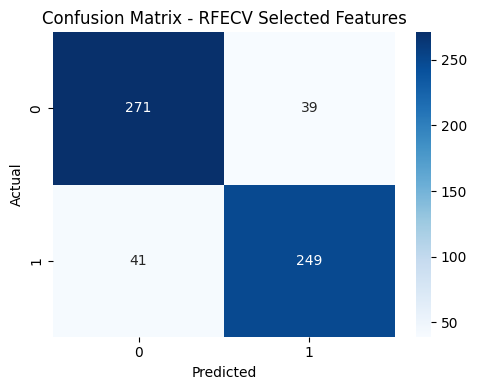

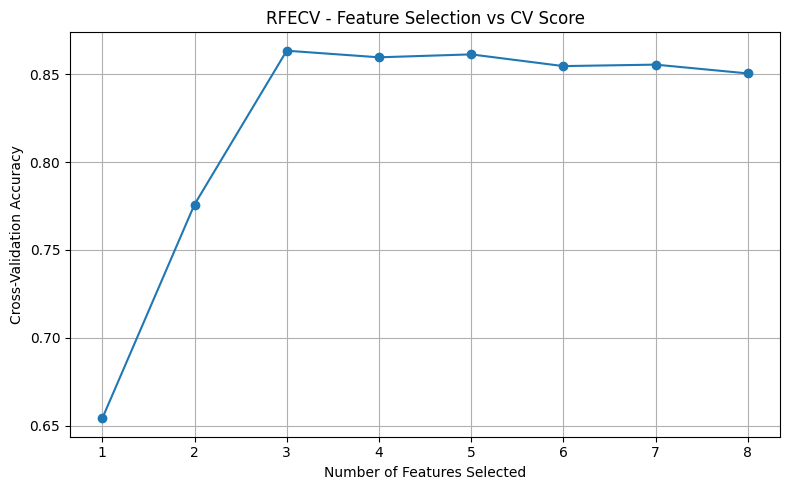

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Convert regression to binary classification
threshold = df['median_house_value'].median()
df['Price_Category'] = (df['median_house_value'] > threshold).astype(int)

# Define features and new target
X = df.drop(['median_house_value', 'Price_Category'], axis=1)
y = df['Price_Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV for feature selection
rfecv_selector = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
rfecv_selector.fit(X_train, y_train)

# Selected features
selected_rfecv_features = X_train.columns[rfecv_selector.support_]
print("✅ Selected Features by RFECV:\n", selected_rfecv_features.tolist())

# Transform data
X_train_selected = rfecv_selector.transform(X_train)
X_test_selected = rfecv_selector.transform(X_test)

# Train model on selected features
rf_model.fit(X_train_selected, y_train)
y_pred = rf_model.predict(X_test_selected)

# Evaluation
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RFECV Selected Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot RFECV results
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rfecv_selector.cv_results_['mean_test_score']) + 1),
         rfecv_selector.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Accuracy")
plt.title("RFECV - Feature Selection vs CV Score")
plt.grid(True)
plt.tight_layout()
plt.show()
